# Notebook: SATtabla - Solución del Problema de Fichas

## Introducción al Algoritmo SATtabla

El algoritmo `SATtabla` implementa la comprobación de satisfacibilidad por fuerza bruta (tabla de verdad).
Funciona generando todas las posibles interpretaciones para las variables proposicionales y evaluando la fórmula en cada interpretación hasta encontrar una que la satisfaga.

**Complejidad**: O(2^n) en tiempo y O(n) en memoria adicional (n = número de variables).

**Casos de uso**: validación y depuración de fórmulas pequeñas, comprobación exhaustiva cuando n es muy pequeño.

**Ventajas**: sencillo, garantiza encontrar una solución si existe.

**Limitaciones**: se vuelve intratable para n moderadamente grandes (aquí n=48, por tanto puede ser costoso).

En este notebook aplicaremos `SATtabla` al problema de las fichas (tablero 4x4, 3 figuras).
Usaremos la clase `Fichas` definida en `Archivos/Proyecto.py` para obtener las 7 reglas en su representación proposicional, y la función `inorder_to_tree` de `Archivos/Logica.py` para parsear las fórmulas.

In [1]:
import sys
import os
import time
sys.path.insert(0, os.path.abspath('.'))
sys.path.append('Archivos')

from Proyecto import Fichas
from Logica import inorder_to_tree, Ytoria
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120


In [2]:
p = Fichas()
reglas = p.reglas
print('Número de reglas:', len(reglas))
for i, r in enumerate(reglas, start=1):
    print(f'Regla {i}:', str(r)[:120] + ('' if len(str(r))<120 else '...'))


Número de reglas: 7
Regla 1: (((((((((((((((ĠOĤ)OĨ)OĬ)Oġ)Oĥ)Oĩ)Oĭ)OĢ)OĦ)OĪ)OĮ)Oģ)Oħ)Oī)Oį)
Regla 2: (((((((((((((((ĀOĄ)OĈ)OČ)Oā)Oą)Oĉ)Oč)OĂ)OĆ)OĊ)OĎ)Oă)Oć)Oċ)Oď)
Regla 3: (((((((((((((((ĐOĔ)OĘ)OĜ)Ođ)Oĕ)Oę)Oĝ)OĒ)OĖ)OĚ)OĞ)Oē)Oė)Oě)Oğ)
Regla 4: ((((((((((((((ĀOĐ)OĠ)Oā)Ođ)Oġ)OĂ)OĒ)OĢ)Oă)Oē)Oģ)Y(((((((((((ĄOĔ)OĤ)Oą)Oĕ)Oĥ)OĆ)OĖ)OĦ)Oć)Oė)Oħ))Y(((((((((((ĈOĘ)OĨ)Oĉ)Oę)...
Regla 5: ((((((((((((((((((((((((((((((((((((((((((((((((Ā=Č)Y(Đ=Ĝ))Y(Ġ=Ĭ))Y(Ą=Ĉ))Y(Ĕ=Ę))Y(Ĥ=Ĩ))Y(Ĉ=Ą))Y(Ę=Ĕ))Y(Ĩ=Ĥ))Y(Č=Ā))Y(Ĝ=Đ...
Regla 6: ((((((((((((((((((((((((((((((((((((((((((((((((-ĀO-Đ)Y(-ĀO-Ġ))Y(-ĐO-Ġ))Y(-ĄO-Ĕ))Y(-ĄO-Ĥ))Y(-ĔO-Ĥ))Y(-ĈO-Ę))Y(-ĈO-Ĩ))Y(-...
Regla 7: ((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((-ĀO-ā)Y(-ĀO-Ă))Y(-ĀO-ă))Y(-āO-Ă))Y(-āO-ă))Y(-ĂO-...


## 1) Pruebas individuales por regla
Para cada regla (1..7) ejecutamos `SATtabla` y visualizamos el modelo encontrado (si existe).
Se registrará también el tiempo de ejecución.

Regla 1 - SAT: True Tiempo(s): 0.011254


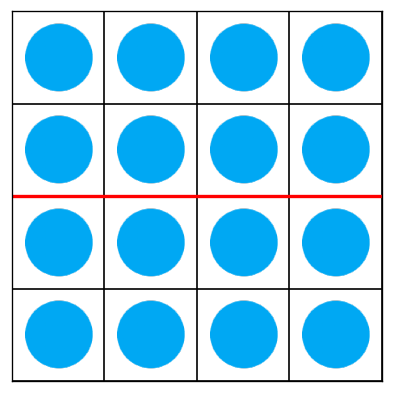

In [3]:
# Regla 1: al menos un círculo
F1 = inorder_to_tree(reglas[0])
t0 = time.time()
I1 = F1.SATtabla()
t1 = time.time()
print('Regla 1 - SAT:', I1 is not None, 'Tiempo(s):', round(t1-t0,6))
if I1 is not None:
    p.visualizar(I1)


Regla 2 - SAT: True Tiempo(s): 0.010907


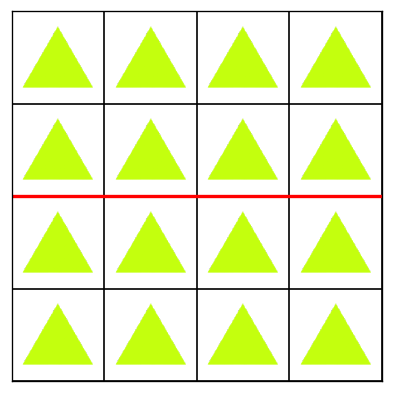

In [4]:
# Regla 2: al menos un triángulo
F2 = inorder_to_tree(reglas[1])
t0 = time.time()
I2 = F2.SATtabla()
t1 = time.time()
print('Regla 2 - SAT:', I2 is not None, 'Tiempo(s):', round(t1-t0,6))
if I2 is not None:
    p.visualizar(I2)


Regla 3 - SAT: True Tiempo(s): 0.010932


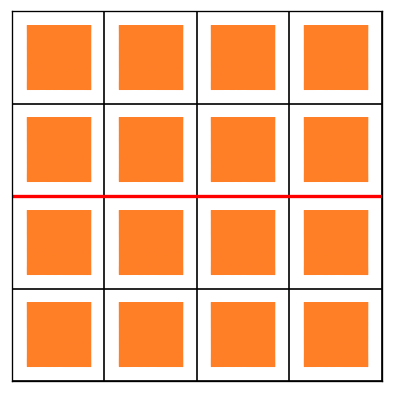

In [5]:
# Regla 3: al menos un cuadrado
F3 = inorder_to_tree(reglas[2])
t0 = time.time()
I3 = F3.SATtabla()
t1 = time.time()
print('Regla 3 - SAT:', I3 is not None, 'Tiempo(s):', round(t1-t0,6))
if I3 is not None:
    p.visualizar(I3)


In [ ]:
# Regla 4: no filas vacías
F4 = inorder_to_tree(reglas[3])
t0 = time.time()
I4 = F4.SATtabla()
t1 = time.time()
print('Regla 4 - SAT:', I4 is not None, 'Tiempo(s):', round(t1-t0,6))
if I4 is not None:
    p.visualizar(I4)


In [ ]:
# Regla 5: simetría horizontal
F5 = inorder_to_tree(reglas[4])
t0 = time.time()
I5 = F5.SATtabla()
t1 = time.time()
print('Regla 5 - SAT:', I5 is not None, 'Tiempo(s):', round(t1-t0,6))
if I5 is not None:
    p.visualizar(I5)


In [ ]:
# Regla 6: solo una ficha por casilla
F6 = inorder_to_tree(reglas[5])
t0 = time.time()
I6 = F6.SATtabla()
t1 = time.time()
print('Regla 6 - SAT:', I6 is not None, 'Tiempo(s):', round(t1-t0,6))
if I6 is not None:
    p.visualizar(I6)


In [ ]:
# Regla 7: no repetición de la misma figura en una fila
F7 = inorder_to_tree(reglas[6])
t0 = time.time()
I7 = F7.SATtabla()
t1 = time.time()
print('Regla 7 - SAT:', I7 is not None, 'Tiempo(s):', round(t1-t0,6))
if I7 is not None:
    p.visualizar(I7)


## 2) Combinaciones progresivas de reglas
Probamos las combinaciones solicitadas (1+2, 1+2+3, 1-4, 1-5, 1-6, 1-7).
Usamos conjunción lógica (`Y`) entre las reglas para forzar que todas se cumplan simultáneamente.

In [ ]:
# Combinación 1+2
comb_12 = Ytoria([reglas[0], reglas[1]])
F_12 = inorder_to_tree(comb_12)
t0 = time.time()
I_12 = F_12.SATtabla()
t1 = time.time()
print('1+2 - SAT:', I_12 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_12 is not None:
    p.visualizar(I_12)


In [ ]:
# Combinación 1+2+3
comb_123 = Ytoria([reglas[0], reglas[1], reglas[2]])
F_123 = inorder_to_tree(comb_123)
t0 = time.time()
I_123 = F_123.SATtabla()
t1 = time.time()
print('1+2+3 - SAT:', I_123 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_123 is not None:
    p.visualizar(I_123)


In [ ]:
# Combinación 1-4 (1..4)
comb_1_4 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3]])
F_1_4 = inorder_to_tree(comb_1_4)
t0 = time.time()
I_1_4 = F_1_4.SATtabla()
t1 = time.time()
print('1-4 - SAT:', I_1_4 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_4 is not None:
    p.visualizar(I_1_4)


In [ ]:
# Combinación 1-5 (1..5)
comb_1_5 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4]])
F_1_5 = inorder_to_tree(comb_1_5)
t0 = time.time()
I_1_5 = F_1_5.SATtabla()
t1 = time.time()
print('1-5 - SAT:', I_1_5 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_5 is not None:
    p.visualizar(I_1_5)


In [ ]:
# Combinación 1-6 (1..6)
comb_1_6 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4], reglas[5]])
F_1_6 = inorder_to_tree(comb_1_6)
t0 = time.time()
I_1_6 = F_1_6.SATtabla()
t1 = time.time()
print('1-6 - SAT:', I_1_6 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_6 is not None:
    p.visualizar(I_1_6)


In [ ]:
# Combinación 1-7 (todas)
comb_1_7 = Ytoria(reglas)
F_1_7 = inorder_to_tree(comb_1_7)
t0 = time.time()
I_1_7 = F_1_7.SATtabla()
t1 = time.time()
print('1-7 - SAT:', I_1_7 is not None, 'Tiempo(s):', round(t1-t0,6))
if I_1_7 is not None:
    p.visualizar(I_1_7)


## 3) Resultado completo (Reglas 1-7)
Ejecutamos `SATtabla` sobre la conjunción de todas las reglas y mostramos el tiempo y la visualización final.

In [ ]:
all_formula = Ytoria(reglas)
F_all = inorder_to_tree(all_formula)
t0 = time.time()
I_all = F_all.SATtabla()
t1 = time.time()
print('Todas las reglas: SAT=', I_all is not None, 'Tiempo(s)=', round(t1-t0,6))
if I_all is not None:
    try:
        p.visualizar(I_all)
    except Exception as e:
        print('Error al visualizar la solución completa:', e)


## 4) Análisis de resultados
En esta sección se comparan los tiempos obtenidos y se comenta cómo afectan las restricciones adicionales a la dificultad del problema.

- Observa que `SATtabla` escala exponencialmente: añadir reglas que introducen más variables o cláusulas puede incrementar el tiempo de forma significativa.
- Para comparaciones reproducibles, ejecuta las celdas varias veces y registra los tiempos (las diferencias pueden deberse a JIT del sistema y carga del equipo).

### Notas prácticas:
- Para problemas de este tamaño (48 variables) `SATtabla` puede ser lento en la peor casuística; considera usar DPLL/WalkSAT o MiniSat para ejecuciones más rápidas.
- Este notebook sirve para validar correctamente la semántica de las reglas y obtener modelos de referencia.